##$$Question \:3$$

for this question I will be doing a simulation with stars around both galactic neucli in the rest frame of the center of mass of the system. 

###Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

from plots import plot_pos, plot_pos_cm
from initial_conditions import star, star_cond, S_cond, S_condd
from solve_system import derivs, solve_system

:0: FutureWarning: IPython widgets are experimental and may change in the future.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



For this Question I will be doing passages with stars around both $M$ and $S$.

$\rho$ is the distance from a star to $S$. So the x and y postitions of the stars around $S$ would be:

$$r = RS - \rho$$

The initial velocities of these stars would be:

$$v = \sqrt{\frac{GS}{\rho}}$$

In [8]:
def S_star(S, sx, sy, rho, theta, svx, svy):
    """Computes the inital conditions for a single star around S
    
    Parameters
    ----------
    S: float, mass of S
    sx: float, initial x potion of S
    sy: float, initial y postion of S
    rho: float: distance of the star from S
    theta:float: angle from postive x axis around S that the star will appear
    svx: float: initial x velocity of S
    scy: float: initial y velocity of S
    
    Returns:
    -------
    the initial conditions of one star with velocity in cw direction"""
    
    G = 4.498e-6
    
    x0 = rho*np.cos(theta)
    y0 = rho*np.sin(theta)
    x = sx + x0
    y = sy + y0
    
    v = np.sqrt((G*S)/rho)
    
    vx = +v*np.sin(theta) + svx
    vy = -v*np.cos(theta) + svy
    
    return [x,vx,y,vy]

In [9]:
def S_star_neg(S, sx, sy, rho, theta, svx, svy):
    """Computes the inital conditions for a single star around S
    
    Parameters
    ----------
    S: float, mass of S
    sx: float, initial x potion of S
    sy: float, initial y postion of S
    rho: float: distance of the star from S
    theta:float: angle from postive x axis around S that the star will appear
    svx: float: initial x velocity of S
    scy: float: initial y velocity of S
    
    Returns:
    -------
    the initial conditions of one star with velocity in ccw direction"""
    
    G = 4.498e-6
    
    x0 = rho*np.cos(theta)
    y0 = rho*np.sin(theta)
    x = sx + x0
    y = sy + y0
    
    v = np.sqrt((G*S)/rho)
    
    vx = -v*np.sin(theta) + svx
    vy = +v*np.cos(theta) + svy
    
    return [x,vx,y,vy]

In [10]:
def S_star_cond(N, S, sx, sy, rho, svx, svy):
    """Creates initial conditions for number of stars you want in inner layer
    
    Parameters
    ----------
    N: int, number of stars wanted in each shell
    S: float, mass of S
    rho: radius at which you want the stars
    sx: float, initial x radius of S
    sy: float, initial y radius of S
    svx: float, initial x velocity of S
    svy: float, initial y velocity of S
    
    Returns
    -------
    returns array consisting of the inital conditions for each star with stars moving in cw direction
    """
    theta = np.linspace(0,2*np.pi,N)
    cond = np.array([S_star(S, sx, sy, rho, theta[i], svx, svy) for i in range(N)])
    return cond

In [11]:
def S_star_cond_neg(N, S, sx, sy, rho, svx, svy):
    """Creates initial conditions for number of stars you want in inner layer
    
    Parameters
    ----------
    N: int, number of stars wanted in each shell
    S: float, mass of S
    rho: radius at which you want the stars
    sx: float, initial x radius of S
    sy: float, initial y radius of S
    svx: float, initial x velocity of S
    svy: float, initial y velocity of S
    
    Returns
    -------
    returns array consisting of the inital conditions for each star with stars moving in ccw direction
    """
    theta = np.linspace(0,2*np.pi,N)
    cond = np.array([S_star_neg(S, sx, sy, rho, theta[i], svx, svy) for i in range(N)])
    return cond

In [12]:
def sol_morestar_retro(rS, t, M, S, N):
    """Solves the system for N number of stars in retrograde passage
    
    Parameters
    ----------
    rS: float, minimum radius of S from M
    t: array, array of times
    M: float, mass of M
    S: float, mass of S
    N: int, number of stars wanted in inner layer,
        each consecutive layer will have 6 additional stars
    
    Returns
    -------
    Returns the solutions postitions for each star and S at all times for retrograde/retrograde passage
    """
    G = 4.498e-6

    sx,svx,sy,svy = S_cond(rS,50, M, S)

    radi = np.array([0.2*rS, 0.3*rS, 0.4*rS,0.5*rS,0.6*rS])

    star_sols = []
    
    k=N+1
    for r in radi:
        c = star_cond(k,M,r)
        for i in range(k):
            ic = c[i]
            ic = np.append(ic, np.array([sx, svx, sy, svy]))
            sol = solve_system(ic, t, M, S)

            x = sol[:,0]
            y = sol[:,2]
            X = sol[:,4]
            Y = sol[:,6]
            star_sols.append(x)
            star_sols.append(y)
        k+=6
    
    l=N+1
    for r in radi:
        c = S_star_cond_neg(l, S, sx, sy, r, svx, svy)
        for i in range(l):
            ic = c[i]
            ic = np.append(ic, np.array([sx, svx, sy, svy]))
            sol = solve_system(ic, t, M, S)

            x = sol[:,0]
            y = sol[:,2]
            X = sol[:,4]
            Y = sol[:,6]
            star_sols.append(x)
            star_sols.append(y)
        l+=6
    
    all_stars = np.transpose(np.vstack(star_sols))
    starx = all_stars[:,0::2]
    stary = all_stars[:,1::2]
        
    return starx, stary, X, Y

In [5]:
#defining some inital conditions and time array
M = 1e11
S = 1e11
rS = 25
N = 12
t = np.linspace(0,1,500)

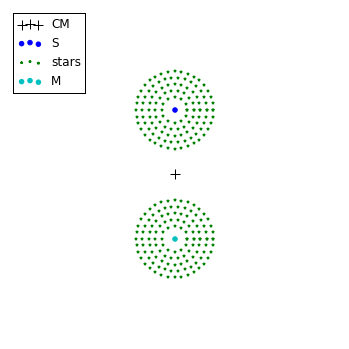

In [9]:
rx, ry, sx, sy = sol_morestar_retro(rS, t, M, S, N)
interact(plot_pos_cm, j = (0,len(t)-1), rx = fixed(rx), ry = fixed(ry), sx=fixed(sx), sy=fixed(sy), M=fixed(M),S=fixed(S));

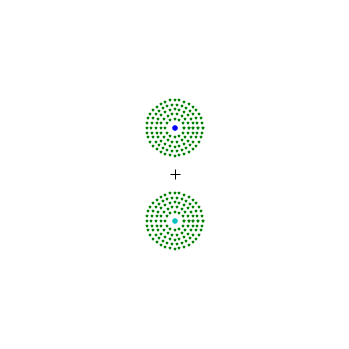

In [30]:
#setting initial conditions for animation
duration = 16.666666666666
fig = plt.figure(figsize= (6,6))
ax = plt.gca()
scat1=plt.scatter(0,0,color= 'k', label= 'CM', marker = "+", s= 100)
scat2=plt.scatter((sx[0]-((M*sx[0])/(M+S))), (sy[0]-((M*sy[0])/(M+S))), color = 'b',label ='S')
scat3=plt.scatter((rx[0]-((S*sx[0])/(M+S))),(ry[0]-((S*sy[0])/(M+S))),color='g',marker="*", label='stars', s=5)
scat4=plt.scatter((-(M*sx[0])/(M+S)),(-(M*sy[0])/(M+S)), color = 'c', label = "M")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.box(False)
plt.tick_params(axis = 'x', top = 'off', bottom = "off", labelbottom= 'off')
plt.tick_params(axis = 'y', right = 'off', left= "off", labelleft= 'off')

def makeframe(t):
    j = int(400*t/duration)#sets time at which to plot based on duration and frame rate
    scat2.set_offsets(np.transpose(np.vstack([sx[j]-((M*sx[j])/(M+S)), (sy[j]-((M*sy[j])/(M+S)))])))
    scat3.set_offsets(np.transpose(np.vstack([(rx[j]-((S*sx[j])/(M+S))),(ry[j]-((S*sy[j])/(M+S)))])))
    scat4.set_offsets(np.transpose(np.vstack([(-(M*sx[j])/(M+S)),(-(M*sy[j])/(M+S))])))
    return mplfig_to_npimage(fig)

In [31]:
animation=mpy.VideoClip(makeframe, duration = duration)
animation.ipython_display(fps=24)

In [32]:
animation.write_videofile('Q3_retro.mp4', fps=24)

[MoviePy] >>>> Building video Q3_retro.mp4
[MoviePy] Writing video Q3_retro.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: Q3_retro.mp4 



In [13]:
def sol_morestar_direct(rS, t, M, S, N):
    """Solves the system for N number of stars for direct passgae
    
    Parameters
    ----------
    rS: float, minimum radius of S from M
    t: array, array of times
    M: float, mass of M
    S: float, mass of S
    N: int, number of stars wanted in inner layer,
        each consecutive layer will have 6 additional stars
    
    Returns
    -------
    Returns the solutions postitions for each star and S at all times for direct/direct passage
    """
    G = 4.498e-6

    sx,svx,sy,svy = S_condd(rS,50, M, S)

    radi = np.array([0.2*rS, 0.3*rS, 0.4*rS,0.5*rS,0.6*rS])

    star_sols = []
    
    k=N+1
    for r in radi:
        c = star_cond(k,M,r)
        for i in range(k):
            ic = c[i]
            ic = np.append(ic, np.array([sx, svx, sy, svy]))
            sol = solve_system(ic, t, M, S)

            x = sol[:,0]
            y = sol[:,2]
            X = sol[:,4]
            Y = sol[:,6]
            star_sols.append(x)
            star_sols.append(y)
        k+=6
    
    l=N+1
    for r in radi:
        c = S_star_cond_neg(l, S, sx, sy, r, svx, svy)
        for i in range(l):
            ic = c[i]
            ic = np.append(ic, np.array([sx, svx, sy, svy]))
            sol = solve_system(ic, t, M, S)

            x = sol[:,0]
            y = sol[:,2]
            X = sol[:,4]
            Y = sol[:,6]
            star_sols.append(x)
            star_sols.append(y)
        l+=6
    
    all_stars = np.transpose(np.vstack(star_sols))
    starx = all_stars[:,0::2]
    stary = all_stars[:,1::2]
        
    return starx, stary, X, Y

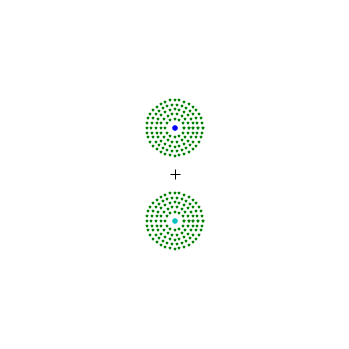

In [26]:
rx1,ry1,sx1,sy1 = sol_morestar_direct(rS, t, M, S, N)
#seting initial conditions for animation
= 16.666666666666
fig = plt.figure(figsize= (6,6))
ax = plt.gca()
scat1=plt.scatter(0,0,color= 'k', label= 'CM', marker = "+", s= 100)
scat2=plt.scatter((sx1[0]-((M*sx1[0])/(M+S))), (sy1[0]-((M*sy1[0])/(M+S))), color = 'b',label ='S')
scat3=plt.scatter((rx1[0]-((S*sx1[0])/(M+S))),(ry1[0]-((S*sy1[0])/(M+S))),color='g',marker="*", label='stars', s=5)
scat4=plt.scatter((-(M*sx1[0])/(M+S)),(-(M*sy1[0])/(M+S)), color = 'c', label = "M")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.box(False)
plt.tick_params(axis = 'x', top = 'off', bottom = "off", labelbottom= 'off')
plt.tick_params(axis = 'y', right = 'off', left= "off", labelleft= 'off')

def makeframe(t):
    j = int(400*t/duration)
    scat2.set_offsets(np.transpose(np.vstack([sx1[j]-((M*sx1[j])/(M+S)), (sy1[j]-((M*sy1[j])/(M+S)))])))
    scat3.set_offsets(np.transpose(np.vstack([(rx1[j]-((S*sx1[j])/(M+S))),(ry1[j]-((S*sy1[j])/(M+S)))])))
    scat4.set_offsets(np.transpose(np.vstack([(-(M*sx1[j])/(M+S)),(-(M*sy1[j])/(M+S))])))
    return mplfig_to_npimage(fig)

In [27]:
animation=mpy.VideoClip(makeframe, duration = duration)
animation.ipython_display(fps=24)

In [29]:
animation.write_videofile('Q3_direct.mp4', fps=24)

[MoviePy] >>>> Building video Q3_direct.mp4
[MoviePy] Writing video Q3_direct.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: Q3_direct.mp4 



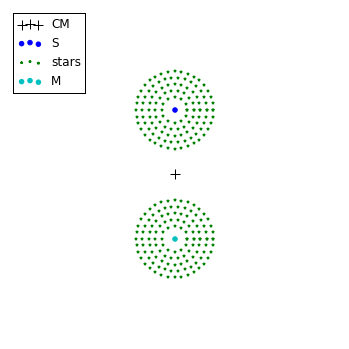

In [17]:
x1,y1,sx1,sy1 = sol_morestar_direct(rS, t, M, S, N)
interact(plot_pos_cm, j = (0,len(t)-1), rx = fixed(x1), ry = fixed(y1), sx=fixed(sx1), sy=fixed(sy1),M=fixed(M),S=fixed(S));

In [13]:
def sol_morestar_both(rS, t, M, S, N):
    """Solves the system for N number of stars for direct passage of M and retrograde passage of S
    
    Parameters
    ----------
    rS: float, minimum radius of S from M
    t: array, array of times
    M: float, mass of M
    S: float, mass of S
    N: int, number of stars wanted in inner layer,
        each consecutive layer will have 5 additional stars
    
    Returns
    -------
    Returns the solutions postitions for each star and S at all times for direct passage of M and retrograde passage of S
    """
    G = 4.498e-6

    sx,svx,sy,svy = S_cond(rS,50, M, S)

    radi = np.array([0.2*rS, 0.3*rS, 0.4*rS,0.5*rS,0.6*rS])

    star_sols = []
    
    k=N+1
    for r in radi:
        c = star_cond(k,M,r)
        for i in range(k):
            ic = c[i]
            ic = np.append(ic, np.array([sx, svx, sy, svy]))
            sol = solve_system(ic, t, M, S)

            x = sol[:,0]
            y = sol[:,2]
            X = sol[:,4]
            Y = sol[:,6]
            star_sols.append(x)
            star_sols.append(y)
        k+=6
    
    l=N+1
    for r in radi:
        c = S_star_cond(l, S, sx, sy, r, svx, svy)
        for i in range(l):
            ic = c[i]
            ic = np.append(ic, np.array([sx, svx, sy, svy]))
            sol = solve_system(ic, t, M, S)

            x = sol[:,0]
            y = sol[:,2]
            X = sol[:,4]
            Y = sol[:,6]
            star_sols.append(x)
            star_sols.append(y)
        l+=6
    
    all_stars = np.transpose(np.vstack(star_sols))
    starx = all_stars[:,0::2]
    stary = all_stars[:,1::2]
        
    return starx, stary, X, Y

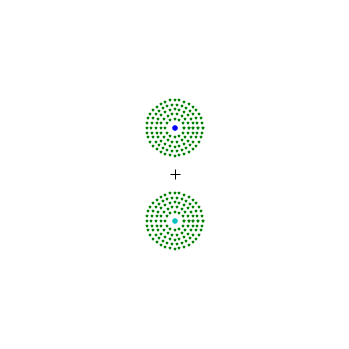

In [14]:
rx2,ry2,sx2,sy2 = sol_morestar_both(rS, t, M, S, N)
#setting initial conditions for animation
duration = 16.666666666666
fig = plt.figure(figsize= (6,6))
ax = plt.gca()
scat1=plt.scatter(0,0,color= 'k', label= 'CM', marker = "+", s= 100)
scat2=plt.scatter((sx2[0]-((M*sx2[0])/(M+S))), (sy2[0]-((M*sy2[0])/(M+S))), color = 'b',label ='S')
scat3=plt.scatter((rx2[0]-((S*sx2[0])/(M+S))),(ry2[0]-((S*sy2[0])/(M+S))),color='g',marker="*", label='stars', s=5)
scat4=plt.scatter((-(M*sx2[0])/(M+S)),(-(M*sy2[0])/(M+S)), color = 'c', label = "M")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.box(False)
plt.tick_params(axis = 'x', top = 'off', bottom = "off", labelbottom= 'off')
plt.tick_params(axis = 'y', right = 'off', left= "off", labelleft= 'off')

def makeframe1(t):
    j = int(400*t/duration)
    scat2.set_offsets(np.transpose(np.vstack([sx2[j]-((M*sx2[j])/(M+S)), (sy2[j]-((M*sy2[j])/(M+S)))])))
    scat3.set_offsets(np.transpose(np.vstack([(rx2[j]-((S*sx2[j])/(M+S))),(ry2[j]-((S*sy2[j])/(M+S)))])))
    scat4.set_offsets(np.transpose(np.vstack([(-(M*sx2[j])/(M+S)),(-(M*sy2[j])/(M+S))])))
    return mplfig_to_npimage(fig)

In [15]:
animation1=mpy.VideoClip(makeframe1, duration = duration)
animation1.ipython_display(fps=24)

In [17]:
animation1.write_videofile('Q3_both.mp4', fps=24)

[MoviePy] >>>> Building video Q3_both.mp4
[MoviePy] Writing video Q3_both.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: Q3_both.mp4 



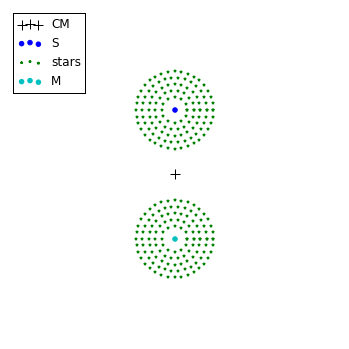

In [22]:
x2,y2,sx2,sy2 = sol_morestar_both(rS, t, M, S, N)
interact(plot_pos_cm, j = (0,len(t)-1), rx = fixed(x2), ry = fixed(y2), sx=fixed(sx2), sy=fixed(sy2), M=fixed(M), S=fixed(S));